<a href="https://colab.research.google.com/github/alvitay/AllLife-Bank-Customer-Segmentation/blob/main/Unsupervised_Learning_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unsupervised Learning Project: AllLife Bank Customer Segmentation**


----------------------------
## **Objective**
-----------------------------

**Identify different segments in the existing customer base**, taking into account their spending patterns as well as past interactions with the bank.

--------------------------
## **About the data**
--------------------------

Data is available on customers of the bank with their credit limit, the total number of credit cards the customer has, and different channels through which the customer has contacted the bank for any queries. These different channels include visiting the bank, online, and through a call center.

- **Sl_no** - Customer Serial Number
- **Customer Key** - Customer identification
- **Avg_Credit_Limit**	- Average credit limit (currency is not specified, you can make an assumption around this)
- **Total_Credit_Cards** - Total number of credit cards
- **Total_visits_bank**	- Total bank visits
- **Total_visits_online** - Total online visits
- **Total_calls_made** - Total calls made

## **Importing libraries and overview of the dataset**

In [ ]:
!pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 39.8 MB/s eta 0:00:00


In [ ]:
# Importing all the necessary packages

import pandas as pd

import numpy as np

import matplotlib.pylab as plt

import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# Importing clustering algorithms
from sklearn.cluster import KMeans

from sklearn.mixture import GaussianMixture

from sklearn_extra.cluster import KMedoids

import warnings
warnings.filterwarnings("ignore")

### **Loading the data**

In [ ]:
# Mouts the drive from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/AllLifeBank/Credit Card Customer Data (1).xlsx')

data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


### **Check the info of the data**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


**Observations:**

- There are **660 observations and 7 columns** in the dataset.
- All the columns have 660 non-null values, i.e., there are **no missing values**.
- **All the columns are of integer data type**.

**There are no missing values. Let us now figure out the number of unique values in each column.**

In [ ]:
data.nunique()

,0
Sl_No,660
Customer Key,655
Avg_Credit_Limit,110
Total_Credit_Cards,10
Total_visits_bank,6
Total_visits_online,16
Total_calls_made,11


- Customer key, which is an identifier, has duplicate values. We will treat the duplicate customer keys before applying any algorithm.

## **Data Preprocessing and Exploratory Data Analysis**

### **Checking duplicate customer keys**

As mentioned above, the Customer Key column has duplicate values. Let's find the rows with duplicate customer keys.

In [ ]:
# There are some duplicates in the column 'Customer Key'. Let us explore

duplicate_keys = data['Customer Key'].duplicated()

data[duplicate_keys]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
332,333,47437,17000,7,3,1,0
398,399,96929,67000,6,2,2,2
432,433,37252,59000,6,2,1,2
541,542,50706,60000,7,5,2,2
632,633,97935,187000,7,1,7,0


- There are **5 duplicate customer keys**. We can **drop these observations**.

**Note:** We are not making any assumptions about which row with the duplicate keys should be dropped. For example, if row 2 and row 10 have duplicate customer keys, then any one of the two rows can be dropped.

In [ ]:
# let's drop duplicate keys

data = data[~data.duplicated('Customer Key')]

### **Dropping columns**

We have done some basic checks. Now, **let's drop the variables that are not required for our analysis**.

In [ ]:
data.drop(columns = ['Sl_No', 'Customer Key'], inplace = True)

### **Checking duplicate rows**

Now, that we have dropped unnecessary columns, we can again check for duplicates. **Duplicates would mean customers with identical features.**

In [ ]:
data[data.duplicated()]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
162,8000,2,0,3,4
175,6000,1,0,2,5
215,8000,4,0,4,7
295,10000,6,4,2,3
324,9000,4,5,0,4
361,18000,6,3,1,4
378,12000,6,5,2,1
385,8000,7,4,2,0
395,5000,4,5,0,1
455,47000,6,2,0,4


- There are 11 duplicate rows. We can drop these duplicate rows from the data.

In [ ]:
data = data[~data.duplicated()]

In [ ]:
data.shape

(644, 5)

- After removing the duplicate keys, the duplicate rows, and dropping unnecessary columns, there are 644 unique observations and 5 columns in our data.

### **Summary Statistics**

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,644.0,34543.478261,37428.704286,3000.0,11000.0,18000.0,48000.00,200000.0
Total_Credit_Cards,644.0,4.694099,2.175338,1.0,3.0,5.0,6.00,10.0
Total_visits_bank,644.0,2.395963,1.626964,0.0,1.0,2.0,4.00,5.0
Total_visits_online,644.0,2.624224,2.957728,0.0,1.0,2.0,4.00,15.0
Total_calls_made,644.0,3.608696,2.880025,0.0,1.0,3.0,5.25,10.0


**Observations:**

- There are 644 observations.
- The average credit limit has a high range from 3000 to 200000. The average average credit limit is approximately 34543.
- The total online visits has the largest range out of the three different methods customers contact the bank for queries. The max total online visits is 15 compared to a max of 5 for total bank visits and 10 for total calls made.
- Customers in this dataset have at least 1 credit card and a max of 10.  The average total credit cards customers have is 4.694099.
- The average credit limit shows a high variability with a standard deviation of 37428.704286.  This is expected as average credit limit would vary from customer to customer depending on several factors such as their spending habits and how long they've had their card.
- Overall, total bank visits seem to have a lesser standard deviation, than the other two methods customers contact the bank for queries.

**Now, let's go ahead with exploring each variable at hand.**

Avg_Credit_Limit
Skew : 2.19


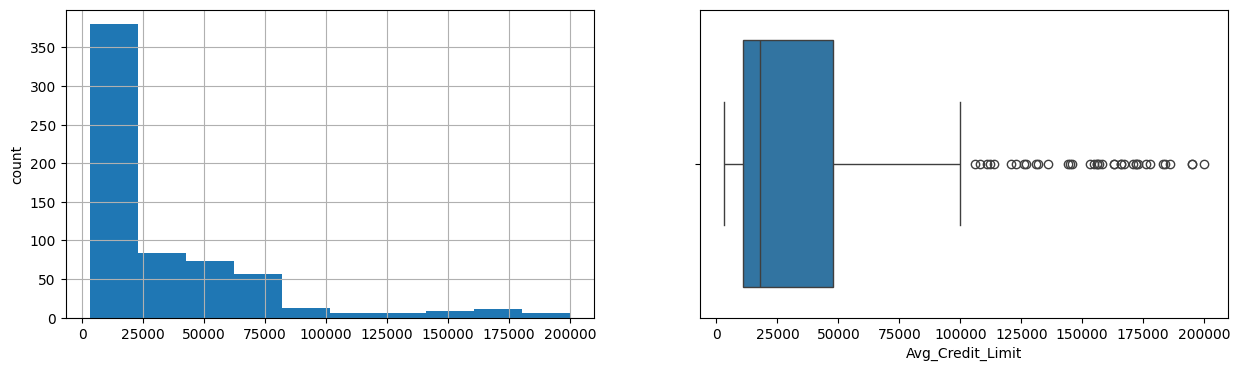

Total_Credit_Cards
Skew : 0.17


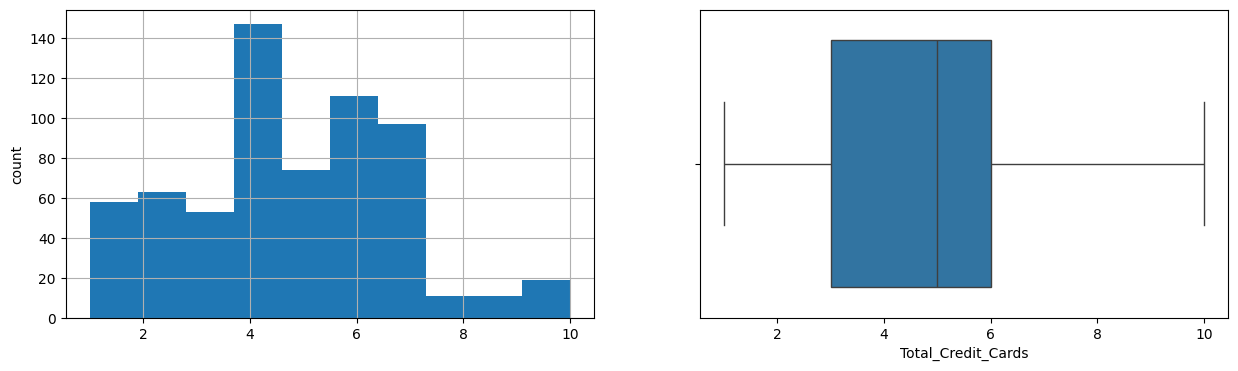

Total_visits_bank
Skew : 0.15


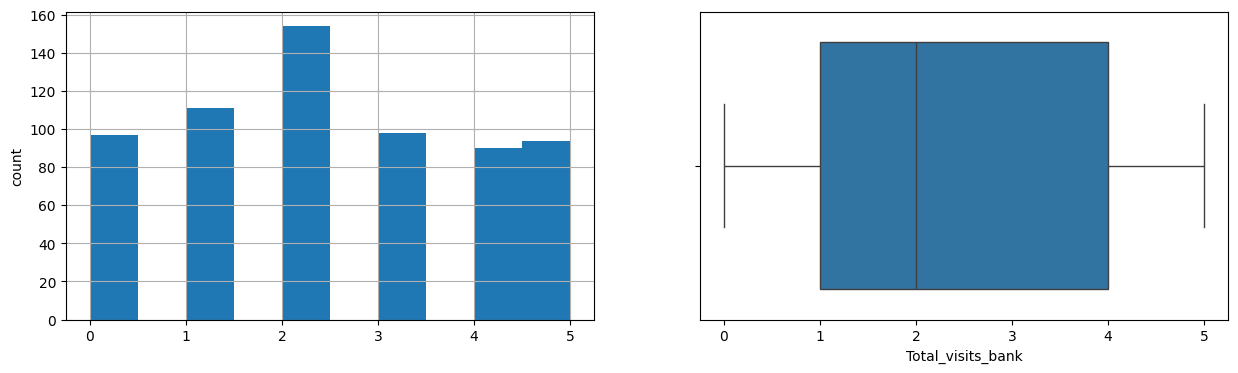

Total_visits_online
Skew : 2.21


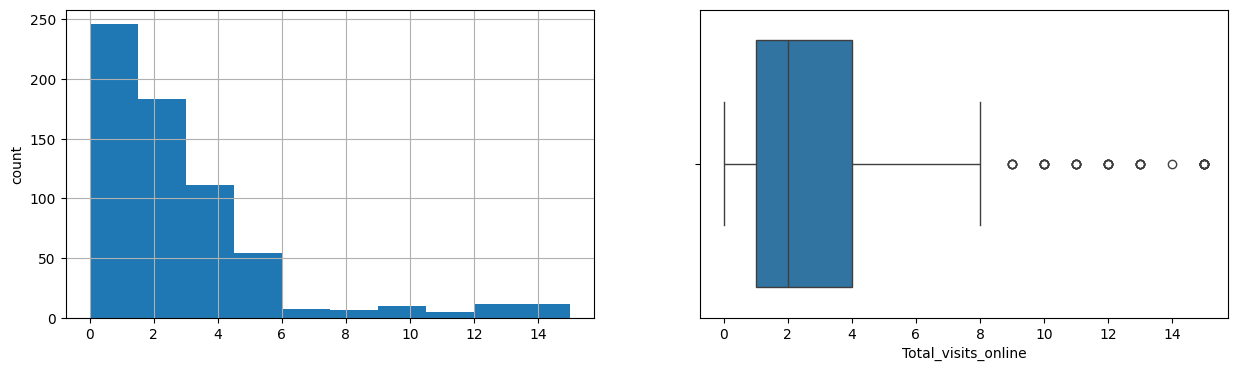

Total_calls_made
Skew : 0.65


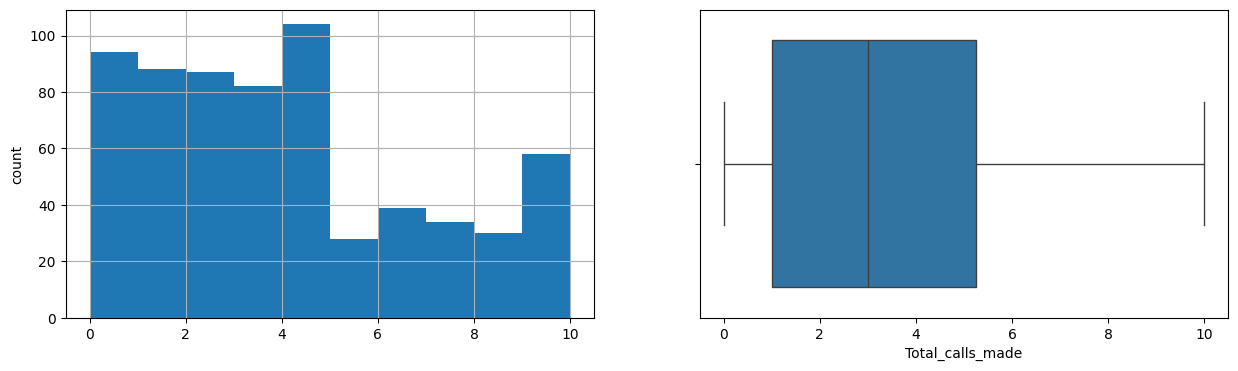

In [ ]:
# complete the BELOW code by filling the blanks, before running the cell to avoid any errors

for col in data.columns:
    print(col)

    print('Skew :', round(data[col].skew(), 2))

    plt.figure(figsize = (15, 4))

    plt.subplot(1, 2, 1)

    data[col].hist()

    plt.ylabel('count')

    plt.subplot(1, 2, 2)

    sns.boxplot(x = data[col])

    plt.show()

**Observation:**

- Most of the variables have right-skewed distributions.
- The distribution for total credit cards and total bank visits are relatively less skewed with no outliers.
- The average credit limit and total online visits have outliers to the right end.
- Most customers have an average credit limit lower than 48000 and between 3 to 6 total credit cards.
- The majority of customers made 1 to 4 total bank visits and total online visits and 1 to 5.25 total calls made.

### **Checking correlation**

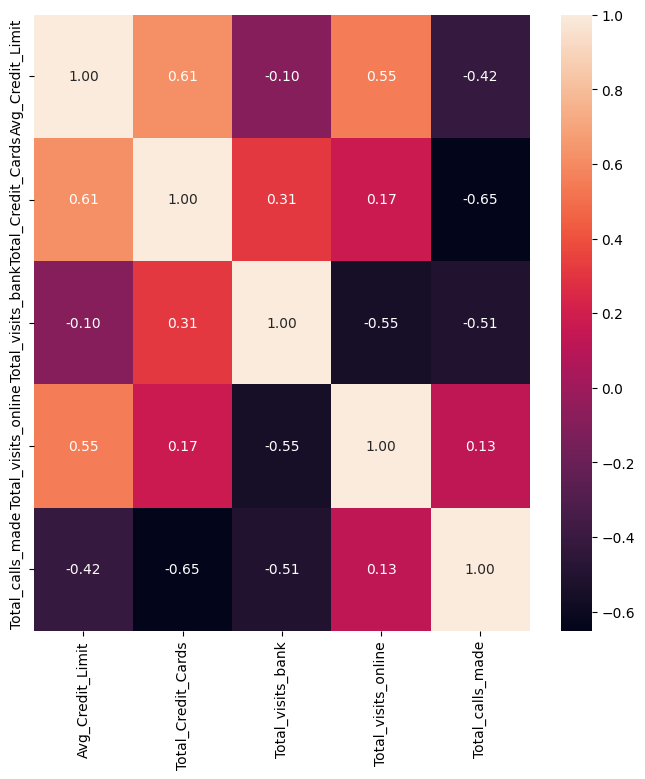

In [ ]:
plt.figure(figsize = (8, 8))

sns.heatmap(data.corr(), annot = True, fmt = '0.2f')

plt.show()

**Observations:**

- Avg_Credit_Limit is positively correlated with Total_Credit_Cards and Total_visits_online which makes sense.
- Avg_Credit_Limit is negatively correlated with Total_calls_made and Total_visits_bank.
- Total_visits_bank, Total_visits_online, Total_calls_made are negatively correlated which implies that majority of customers use only one of these channels to contact the bank.

### **Scaling the data**

In [ ]:
scaler = StandardScaler()

# Standardize the data to have a mean of ~0 and a variance of 1
data_scaled = StandardScaler().fit_transform(data)

### **Applying PCA on scaled data**

In [ ]:
from sklearn.decomposition import PCA

n = data.shape[1]

# Create a PCA instance: pca
pca = PCA(n_components=n)

principal_components = pca.fit_transform(data_scaled)

# Save components to a DataFrame
data_pca = pd.DataFrame(principal_components, columns = data.columns)

In [ ]:
# Creating copy of the data to store labels from each algorithm

data_copy = data_pca.copy(deep = True)

## **K-Means**

Let us now fit the K-means algorithm on our pca components and find out the optimum number of clusters to use.

We will do this in 3 steps:
1. Initialize a dictionary to store the Sum of Squared Error (SSE) for each K
2. Run for a range of Ks and store SSE for each run
3. Plot the SSE vs K and plot the elbow curve

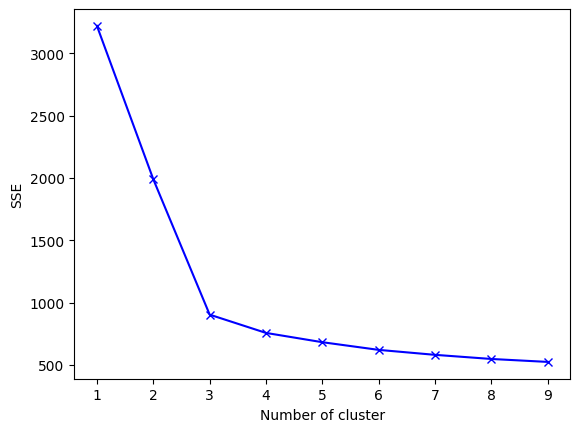

In [ ]:
# step 1
sse = {}

# step 2 - iterate for a range of Ks and fit the pca components to the algorithm.
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, max_iter = 1000, random_state = 1).fit(data_pca)
    sse[k] = kmeans.inertia_     # Use inertia attribute from the clustering object and store the inertia value for that K

# step 3
plt.figure()

plt.plot(list(sse.keys()), list(sse.values()), 'bx-')

plt.xlabel("Number of cluster")

plt.ylabel("SSE")

plt.show()

**Interpretation:**
The graph takes a sharp turn at K=3 as the slope decreases significantly from 2 to 3.  Therefore, 3 is the ideal number of clusters.

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state = 1)                      # Apply the K-Means algorithm
kmeans.fit(data_scaled)                            # Fit the kmeans function on the pca components

# Adding predicted labels to the original data and the copied data
data_copy['Labels'] = kmeans.predict(data_scaled)     # Save the predictions on the pca components from K-Means
data['Labels'] = kmeans.predict(data_scaled)             # Save the predictions on the pca components from K-Means

We have generated the labels with K-means. Now, let us look at the various features based on the labels.

In [ ]:
# Number of observations in each cluster
data.Labels.value_counts()

,count
Labels,
2,374
1,221
0,49


In [ ]:
# Calculating summary statistics of the original data for each label
mean = data.groupby('Labels').mean()

median = data.groupby('Labels').median()

df_kmeans = pd.concat([mean, median], axis = 0)

df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_kmeans.T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,140102.040816,12239.819005,33893.048128,145000.0,12000.0,31500.0
Total_Credit_Cards,8.775510,2.411765,5.508021,9.0,2.0,6.0
Total_visits_bank,0.591837,0.945701,3.489305,1.0,1.0,3.0
Total_visits_online,10.979592,3.561086,0.975936,11.0,4.0,1.0
Total_calls_made,1.102041,6.891403,1.997326,1.0,7.0,2.0


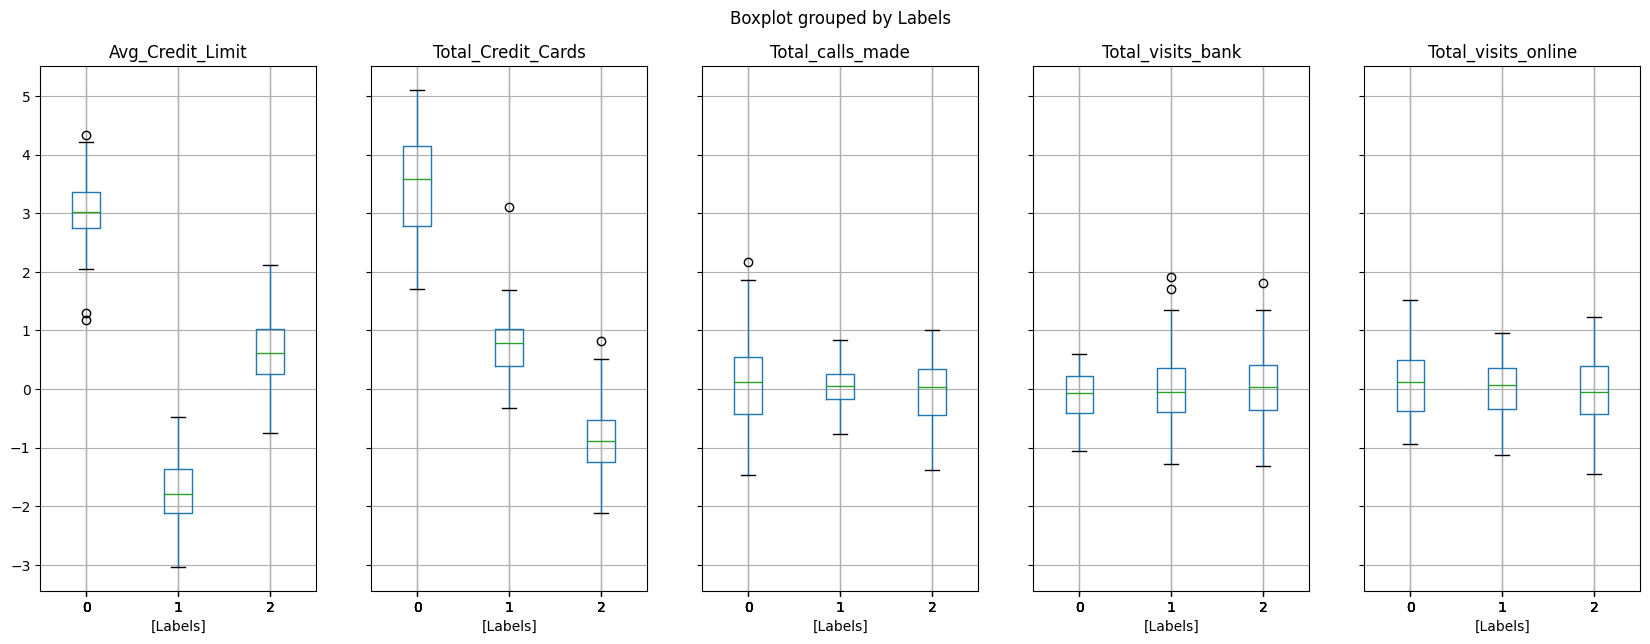

In [ ]:
# Visualizing different features w.r.t K-means labels
data_copy.boxplot(by = 'Labels', layout = (1, 5), figsize = (20, 7))

plt.show()

**Cluster Profiles:**

- Cluster 2 is comprised of a high average credit limit customer group. As observed from the boxplots, this group consists of the highest total number of credit cards.  This cluster may include customers who have a high income and spend a lot of money.  This explains why there aren't very many customers in this cluster (49 observations) compared to the other two clusters.
- Cluster 1 is the largest cluster and seems to have a mid-level of average credit card limit. These customers seem to have the lowest total credit cards.  This cluster may consist of customers in the middle class but may save money and not use their credit cards as much.  There are the most observations in this group (374 observations), which makes sense because the middle class is typically larger.
- Cluster 0 has the lowest average credit limit. These customers have a mid-level of total credit cards as the average is 2.411765.  This cluster may be comprised of lower income customers but still use credit cards to survive.  This cluster has slightly less observations than cluster 1 (221 observations), which supports the idea that each cluster represents a class.
- Regardless of the clusters the customers are in, total calls made, total bank visits, and total online visits are fairly similar.  However, it seems like cluster 2 or the higher-income class makes more total calls.

## **Gaussian Mixture Model**

Let's now create clusters using the Gaussian Mixture Model.

In [ ]:
gmm = GaussianMixture(n_components = 3, random_state = 1)     # Apply the Gaussian Mixture algorithm on the pca components with n_components=3 and random_state=1

gmm.fit(data_pca)    # Fit the model on the pca components

data_copy['GmmLabels'] = gmm.predict(data_pca)

data['GmmLabels'] = gmm.predict(data_pca)

In [ ]:
# Number of observations in each cluster
data.GmmLabels.value_counts()

,count
GmmLabels,
2,374
1,221
0,49


In [ ]:
# Calculating the summary statistics of the original data for each label
original_features = ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made"]

mean = data.groupby('GmmLabels').mean()

median = data.groupby('GmmLabels').median()

df_gmm = pd.concat([mean, median], axis = 0)

df_gmm.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_gmm[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,140102.040816,12239.819005,33893.048128,145000.0,12000.0,31500.0
Total_Credit_Cards,8.775510,2.411765,5.508021,9.0,2.0,6.0
Total_visits_bank,0.591837,0.945701,3.489305,1.0,1.0,3.0
Total_visits_online,10.979592,3.561086,0.975936,11.0,4.0,1.0
Total_calls_made,1.102041,6.891403,1.997326,1.0,7.0,2.0


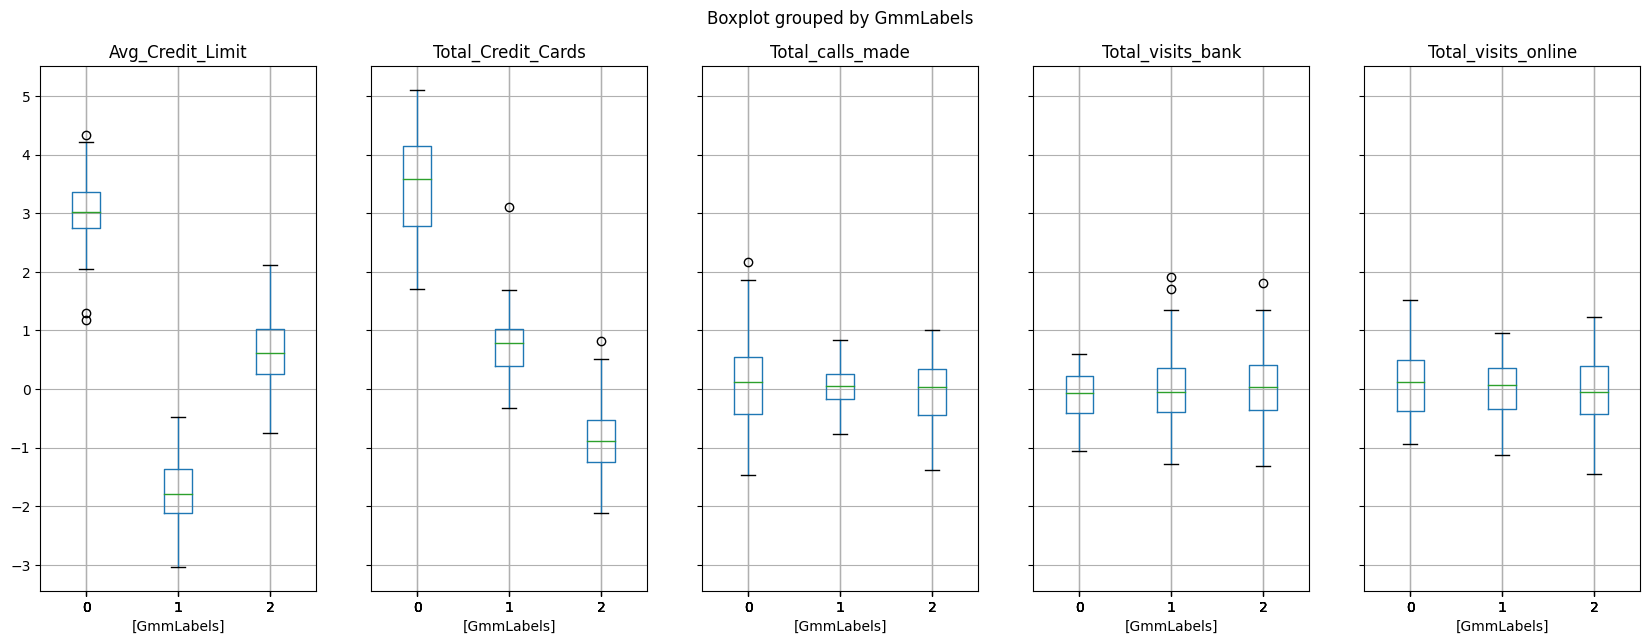

In [ ]:
# Plotting boxplots with the new GMM based labels

features_with_lables = ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made", "GmmLabels"]

data_copy[features_with_lables].boxplot(by = 'GmmLabels', layout = (1, 5),figsize = (20, 7))

plt.show()

**Cluster Profiles:**

- Cluster 2 is comprised of a high average credit limit customer group. As observed from the boxplots, this group consists of the highest total number of credit cards.  This cluster may include customers who have a high income and spend a lot of money.  This explains why there aren't very many customers in this cluster (49 observations) compared to the other two clusters.
- Cluster 1 is the largest cluster and seems to have a mid-level of average credit card limit. These customers seem to have the lowest total credit cards.  This cluster may consist of customers in the middle class but may save money and not use their credit cards as much.  There are the most observations in this group (374 observations), which makes sense because the middle class is typically larger.
- Cluster 0 has the lowest average credit limit. These customers have a mid-level of total credit cards as the average is 2.411765.  This cluster may be comprised of lower income customers but still use credit cards to survive.  This cluster has slightly less observations than cluster 1 (221 observations), which supports the idea that each cluster represents a class.
- Regardless of the clusters the customers are in, total calls made, total bank visits, and total online visits are fairly similar.  However, it seems like cluster 2 or the higher-income class makes more total calls.


**Comparing Clusters:**

Both algorithms yield the same results.

## **K-Medoids**

In [ ]:
kmedo = KMedoids(n_clusters = 3, random_state = 1)      # Apply the K-Medoids algorithm on the pca components with n_components=3 and random_state=1

kmedo.fit(data_pca)      # Fit the model on the pca components

data_copy['kmedoLabels'] = kmedo.predict(data_pca)

data['kmedoLabels'] = kmedo.predict(data_pca)

In [ ]:
# Number of observations in each cluster
data.kmedoLabels.value_counts()

,count
kmedoLabels,
2,289
0,222
1,133


In [ ]:
# Calculating summary statistics of the original data for each label
mean = data.groupby('kmedoLabels').mean()

median = data.groupby('kmedoLabels').median()

df_kmedoids = pd.concat([mean, median], axis = 0)

df_kmedoids.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_kmedoids[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,12216.216216,85052.631579,28449.826990,12000.0,68000.0,20000.0
Total_Credit_Cards,2.423423,7.030075,5.363322,2.0,7.0,5.0
Total_visits_bank,0.950450,1.691729,3.830450,1.0,2.0,4.0
Total_visits_online,3.554054,4.639098,0.982699,4.0,2.0,1.0
Total_calls_made,6.878378,1.969925,1.851211,7.0,2.0,2.0


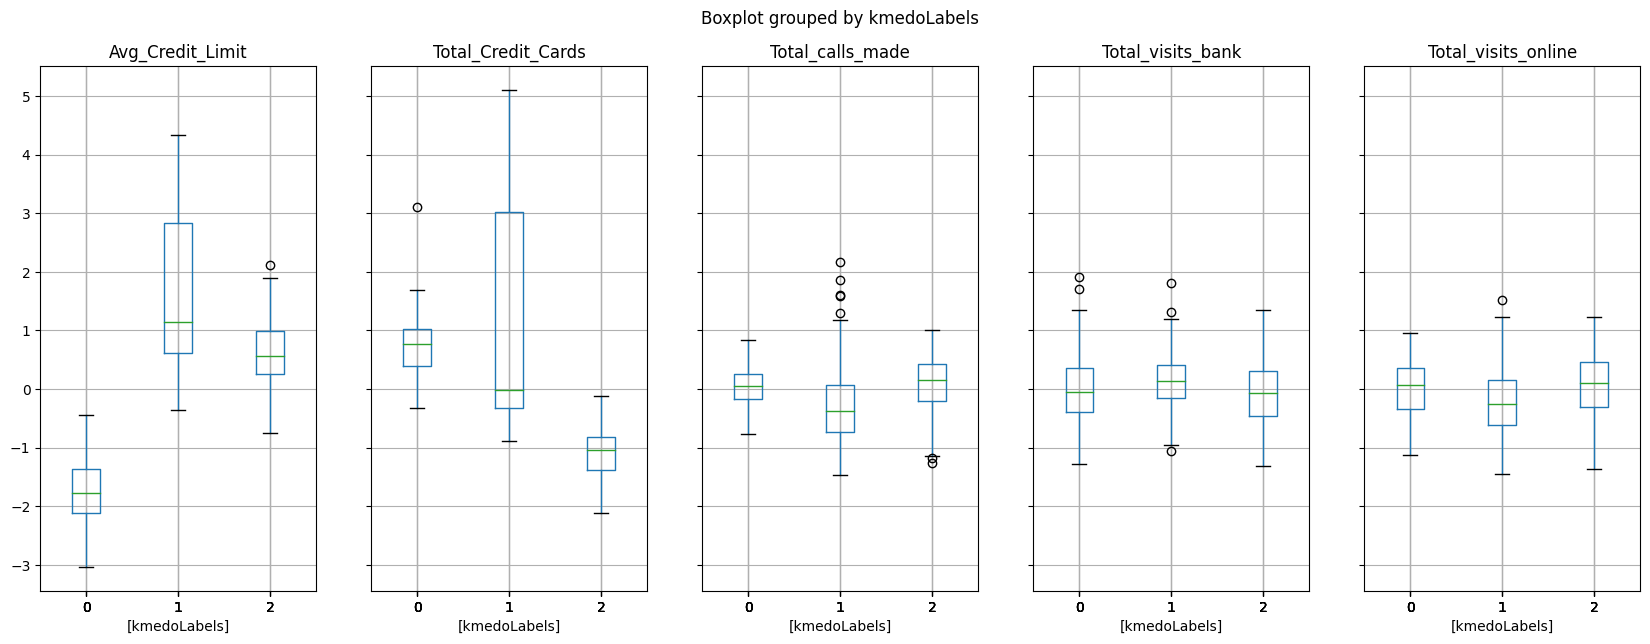

In [ ]:
# Plotting boxplots with the new K-Medoids based labels

features_with_lables = ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made", "kmedoLabels"]

data_copy[features_with_lables].boxplot(by = 'kmedoLabels', layout = (1, 5), figsize = (20, 7))

plt.show()

**Cluster Profiles:**

The cluster profiles using the K-Medoids clustering algorithm yields similar results to the K-Means clustering algorithm and Gaussian Mixture Model clusering algorithm.  However, cluster 1 and cluster 2 seem to have switched.  Cluster 0 would represent lower-income customers who have a lower credit limit but may use credit cards to survive, as represented by the mid-level of total credit cards.  Cluster 1 is comprised of customers with a high average credit limit and high total number of credit cards.  This cluster reflects cusomers who have high income and spend lots of money.  This cluster is also the smallest group (133 observations), which is representative of the high-income class.  Lastly, cluster 2, the largest cluster (289 observations), consists of customers with a mid-level of average credit limit and the lowest total number of credit cards.  This is representative of a middle class.  Regardless of the clusters the customers are in, total calls made, total bank visits, and total online visits are fairly similar.  Although, it appears that cluster 1 or the higher-income class primarily makes less total calls, there are several outliers in this group.

Let's compare the clusters from K-Means and K-Medoids

In [ ]:
comparison = pd.concat([df_kmedoids, df_kmeans], axis = 1)[original_features]

comparison

,Avg_Credit_Limit,Avg_Credit_Limit,Total_Credit_Cards,Total_Credit_Cards,Total_visits_bank,Total_visits_bank,Total_visits_online,Total_visits_online,Total_calls_made,Total_calls_made
group_0 Mean,12216.216216,140102.040816,2.423423,8.775510,0.950450,0.591837,3.554054,10.979592,6.878378,1.102041
group_1 Mean,85052.631579,12239.819005,7.030075,2.411765,1.691729,0.945701,4.639098,3.561086,1.969925,6.891403
group_2 Mean,28449.826990,33893.048128,5.363322,5.508021,3.830450,3.489305,0.982699,0.975936,1.851211,1.997326
group_0 Median,12000.000000,145000.000000,2.000000,9.000000,1.000000,1.000000,4.000000,11.000000,7.000000,1.000000
group_1 Median,68000.000000,12000.000000,7.000000,2.000000,2.000000,1.000000,2.000000,4.000000,2.000000,7.000000
group_2 Median,20000.000000,31500.000000,5.000000,6.000000,4.000000,3.000000,1.000000,1.000000,2.000000,2.000000


**Comparing Clusters:**

The stories for both algorithms seem to be similar but cluster 1 and 2 have switched.